<h1 style="text-align: center;">Prueba Modulo Fundamentos Data Science - Notebook 1</h1>

## Hito 1

## Problema de Clasificacion y modelo predictivo 

### Preliminares y Aspectos computacionales


En esta sesión trabajaremos con una base de datos llamada `income-db.csv` sobre las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobrezaextrema. Dentro de ésta se registran las siguientes variables:
- `income`: <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, >50K si el individuo percibe ingresos superiores a 50.000 dólares anuales.**(Vector objetivo)**
- `age`: Edad del individuo.
- `workclass`: Naturaleza de la organización que emplea al individuo.
- `education`: Nivel educacional del individuo:Bachelors (Licenciado), Some-college
(Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school
(Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc
(Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio),
Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio),
Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
- `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado =
Ingresos generados por inversiones fuera del trabajo asalariado.
- `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
- `fnlwgt`: Ponderador muestral.
- `marital-status`: Estado civil del individuo: Married-civ-spouse (Casado/a régimen
civil), Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a),
Widowed (Viudo/a), Married-spouse-absent (Casado con esposo/a ausente),
Married-AF-spouse (Casado/a régimen castrense).
- `occupation`: Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair
(Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial
(Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y
ornato), Machine-op-inspct (Inspectores de maquinarias), Adm-clerical
(Administrativos servicio al cliente), Farming-fishing (Pesca-ganadería),
Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv
(servicios de seguridad), Armed-Forces (Fuerzas armadas).
- `relationship`: Relación respecto a su familia Wife(Esposa), Own-child (hijo único),
Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar
de otro tipo), Unmarried (Soltero).
- `race`: Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del
Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other
(Otro grupo), Black (Afroamericano).
- `sex`: Sexo del encuestado.
- `hours-per-week`: Cantidad de horas trabajadas por semana.
- `native-country`: País de origen. United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China,
Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago,
Peru, Hong, Holand-Netherlands.

### Preliminares

Hay una variable categorica como vector objetivo, se abordara como un problema de clasificacion. La variable objetivo se binarizara (0 y 1), y se utilizara un modelo de regresion logistica para el problema, esto es porque este tipo de modelo funciona bien para predecir variables categoricas que son 0 y 1, ya que se usa una funcion logistica . Se observara el comportamiento de los datos con describe y graficos. A continuacion usaran todas la variables para generar un modelo logistico, luego se sacaran variables para depurar el modelo, se entrenara un modelo con esta variables del modelo depuradose y despues se evaluaran sus metricas de desempeño. Tambien se probaran diferentes diseños para modelacion predictiva (al menos 3)

#### Metricas de desempeño

- precision, recall, f1-score, accuracy, roc_auc = para evaluar el modelo que se entrenara


#### Librerias

***Por ahora tengo las funciones dentro del mismo notebook, espero que para el otro hito las funciones esten uno aparte***

In [1]:
#manejo de datos
import pandas as pd
import numpy as np

#graficas
import seaborn as sns
import matplotlib.pyplot as plt

#crear modelo logistico
import statsmodels.api as sm
import statsmodels.formula.api as smf

#entrenar el modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#metricas
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

#otras
import warnings
warnings.simplefilter("ignore")

#Funciones propias
import funciones_propias as fp

- pandas - numpy = Se utilizara para el manejo de los datos, como por ejemplo para preprocesar
- seaborn - matplotlib.pyplot = Se utilizara para la creacion de graficos
- statsmodels = Se utilizara la creacion del modelo logistico
- train_test_split = Se utilizara para separar los datos en test y train
- LogisticRegression = Se utilizara para entrenar un modelo logistico
- StandardScaler = Se utilizara para estandarizar los datos
- classification_report - roc_auc_score, roc_curve = Se utilizara para obtener las metricas de desempeño
- warnings = Se utilizara evitar avisos
- funciones_creadas = funciones que tengo que crear, para evitar repetir codigo

In [2]:
df = pd.read_csv("income-db.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Hito 2

#### Preprocesamiento y recodificación de datos.

#### Datos nulos.

In [4]:
df = df.replace(["?"], [np.nan])

In [5]:
for c in df.columns:
    cantidad_nulos, porcentaje_nulos= fp.nulos(df, c)
    print(f"La columna {c} tiene {cantidad_nulos} casos perdidos, que corresponden  al {round(porcentaje_nulos, 2)}%")

La columna age tiene 0 casos perdidos, que corresponden  al 0.0%
La columna workclass tiene 2799 casos perdidos, que corresponden  al 5.73%
La columna fnlwgt tiene 0 casos perdidos, que corresponden  al 0.0%
La columna education tiene 0 casos perdidos, que corresponden  al 0.0%
La columna educational-num tiene 0 casos perdidos, que corresponden  al 0.0%
La columna marital-status tiene 0 casos perdidos, que corresponden  al 0.0%
La columna occupation tiene 2809 casos perdidos, que corresponden  al 5.75%
La columna relationship tiene 0 casos perdidos, que corresponden  al 0.0%
La columna race tiene 0 casos perdidos, que corresponden  al 0.0%
La columna gender tiene 0 casos perdidos, que corresponden  al 0.0%
La columna capital-gain tiene 0 casos perdidos, que corresponden  al 0.0%
La columna capital-loss tiene 0 casos perdidos, que corresponden  al 0.0%
La columna hours-per-week tiene 0 casos perdidos, que corresponden  al 0.0%
La columna native-country tiene 857 casos perdidos, que corr

In [6]:
df = df.dropna()

#### Graficos para inspeccion visual de variables para recodificacion

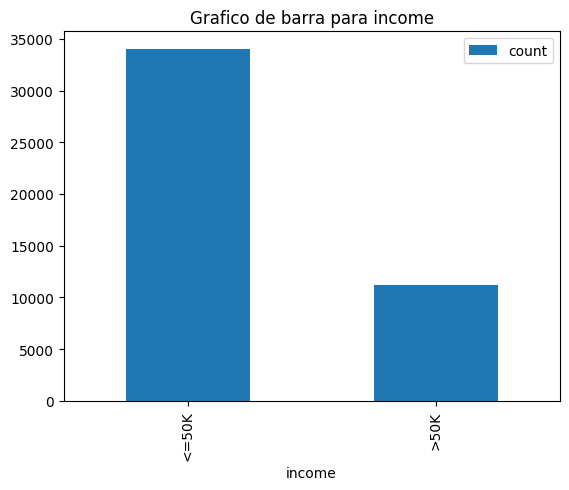

In [7]:
fp.plot_freq(df, "income")

**Comentario:** La variable income tiene muchas observaciones de <=50k, lo que puedo crear un desbalance cuando se cree el modelo, habria que fijarse en las metricas que se obtengan

In [8]:
df["income"] = np.where(df["income"] == ">50K", 1, 0)

In [9]:
def cambio_nombre_col(data, var, n_var):
    data.rename(columns={var:n_var}, inplace=True)

In [10]:
cambio_nombre_col(df,'occupation','collars')

In [11]:
df = df.replace(["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"], 
                ["white-collar", "white-collar", "white-collar", "white-collar", "white-collar"])


In [12]:
df = df.replace(["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", 
                 "Protective-serv", "Priv-house-serv"], ["blue-collar", "blue-collar", "blue-collar", "blue-collar", 
                 "blue-collar", "blue-collar", "blue-collar"])

In [13]:
df = df.replace(["Other-service", "Armed-Forces"], ["c_others", "c_others"])


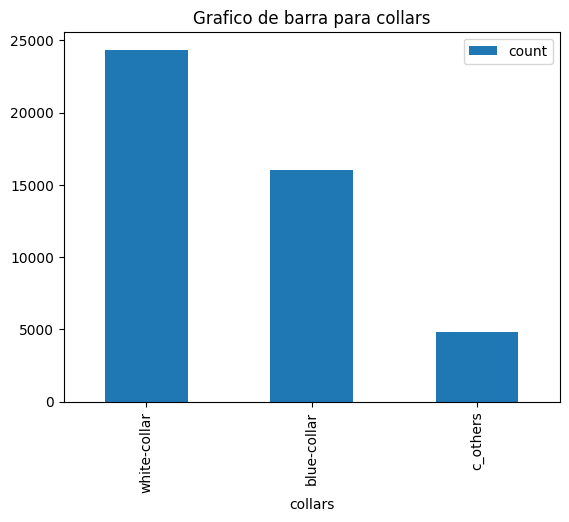

In [14]:
fp.plot_freq(df, "collars")

**Comentario:** La variable white-collar es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en others, esta incluido fuerzas armadas, no se como se habra tomado la muestra, pero generalmente son pocos en una sociedad, y tambien yo hubiera pensado que blue collars tendria mas porque tiene mas clases y es mas variada

In [15]:
df["blue-collar"] = np.where(df["collars"] == "blue-collar", 1, 0)
df["c_others"] = np.where(df["collars"] == "c_others", 1, 0)

In [16]:
cambio_nombre_col(df, "workclass", "workclass_recod")

In [17]:
df = df.replace(["Federal-gov"], ["federal-gov"])


In [18]:
df = df.replace(["State-gov","Local-gov"], ["state-level-gov","state-level-gov"])


In [19]:
df = df.replace(["Self-emp-inc","Self-emp-not-inc"], ["self-employed","self-employed"])

In [20]:
df = df.replace(["Never-worked","Without-pay"], ["unemployed","unemployed"])

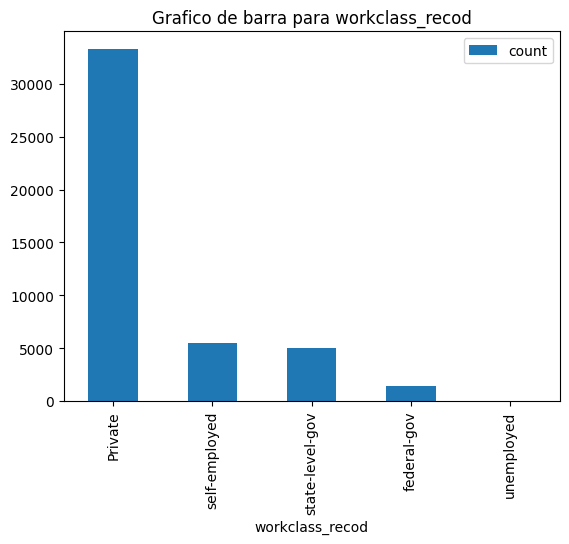

In [21]:
fp.plot_freq(df, "workclass_recod")

**Comentario:** La variable Private es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en unemployed (21), la mayoria trabaja en el sector privado

In [22]:
df["self-employed"] = np.where(df["workclass_recod"] == "self-employed", 1, 0)
df["state-level-gov"] = np.where(df["workclass_recod"] == "state-level-gov", 1, 0)
df["federal-gov"] = np.where(df["workclass_recod"] == "federal-gov", 1, 0)
df["unemployed"] = np.where(df["workclass_recod"] == "unemployed", 1, 0)

In [23]:
cambio_nombre_col(df, "education", "educ_recod")

In [24]:
df = df.replace(["Preschool"], ["preschool"])

In [25]:
df = df.replace(["1st-4th", "5th-6th"], ["elementary-school","elementary-school"])

In [26]:
df = df.replace(["7th-8th", "9th", "10th", "11th", "12th", "HS-grad"], ["high-school","high-school", "high-school", "high-school", "high-school", "high-school"])

In [27]:
df = df.replace(["Assoc-voc","Assoc-acdm", "Some-college"], ["college","college", "college"])

In [28]:
df = df.replace(["Bachelors","Masters", "Prof-school", "Doctorate"], ["university","university", "university", "university"])

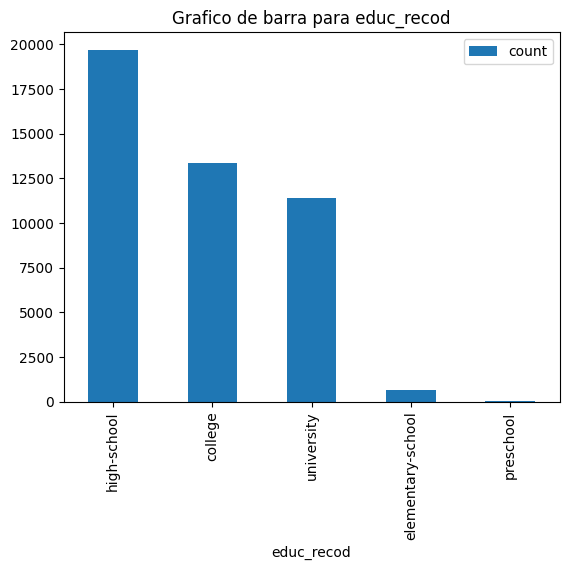

In [29]:
fp.plot_freq(df, "educ_recod")

**Comentario:** La variable high-school es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas tienen grado preescolar y elemental, la mayoria termino o llego hasta la secundaria. Aunque si se suma el college y university, hay mas gente que estudio despues de la secundaria

In [30]:
df["college"] = np.where(df["educ_recod"] == "college", 1, 0)
df["university"] = np.where(df["educ_recod"] == "university", 1, 0)
df["elementary-school"] = np.where(df["educ_recod"] == "elementary-school", 1, 0)
df["preschool"] = np.where(df["educ_recod"] == "preschool", 1, 0)

In [31]:
cambio_nombre_col(df, "marital-status", "civstatus")

In [32]:
df = df.replace(["Married-civ-spouse","Married-spouse-absent", "Married-AF-spouse"], ["married","married", "married"])

In [33]:
df = df.replace(["Divorced"], ["divorced"])

In [34]:
df = df.replace(["Separated"], ["separated"])

In [35]:
df = df.replace(["Widowed"], ["widowed"])

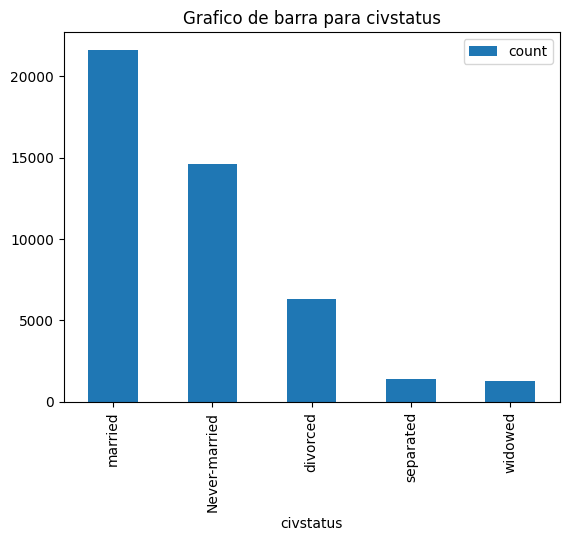

In [36]:
fp.plot_freq(df, "civstatus")

**Comentario:** La variable married es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas observaciones en viudos y separados, la mayoria de las personas estan casadas, pero los never-married igual tienen un cifra considerable

In [37]:
df["Never-married"] = np.where(df["civstatus"] == "Never-married", 1, 0)
df["divorced"] = np.where(df["civstatus"] == "divorced", 1, 0)
df["separated"] = np.where(df["civstatus"] == "separated", 1, 0)
df["widowed"] = np.where(df["civstatus"] == "widowed", 1, 0)

In [38]:
cambio_nombre_col(df, "native-country", "region")

In [39]:
df = df.replace(["Philippines","India", "China", "Japan", "Vietnam", "Iran", "Taiwan", "Thailand",
                "Cambodia", "Hong", "Laos"], 
                ["Asia","Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia"])

In [40]:
df = df.replace(["United-States","Mexico", "Puerto-Rico", "Canada", "El-Salvador", "Cuba", "Jamaica", "Dominican-Republic",
                "Guatemala", "Columbia", "Haiti", "Nicaragua", "Peru", "Ecuador", "Trinadad&Tobago", "Outlying-US(Guam-USVI-etc)",
                "Honduras"], 
                ["America","America", "America", "America", "America", "America", "America", "America", "America", "America",
                 "America", "America", "America", "America", "America", "America", "America"])

In [41]:
df = df.replace(["Germany","England", "Italy", "Poland", "Portugal", "Greece", "Ireland", "France",
                "Yugoslavia", "Scotland", "Hungary","Holand-Netherlands"], 
                ["Europa","Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa", "Europa",
                "Europa"])

In [42]:
df = df.replace(["South"], 
                ["Africa"])

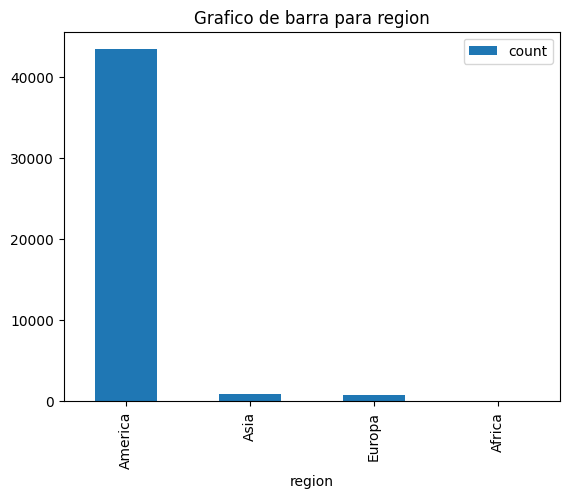

In [43]:
fp.plot_freq(df, "region")

**Comentario:** La variable America es la de mayor frecuencia, al recodificar esta se dejara fuera. America tiene demasiadas observaciones, quizas habria que aplicar otro preprocesamiento aca, no estoy seguro si tambien al tener muchas observaciones de una sola variable puede producir algun tipo de sesgo o sobreajuste.

In [44]:
df["Asia"] = np.where(df["region"] == "Asia", 1, 0)
df["Africa"] = np.where(df["region"] == "Africa", 1, 0)
df["Europa"] = np.where(df["region"] == "Europa", 1, 0)

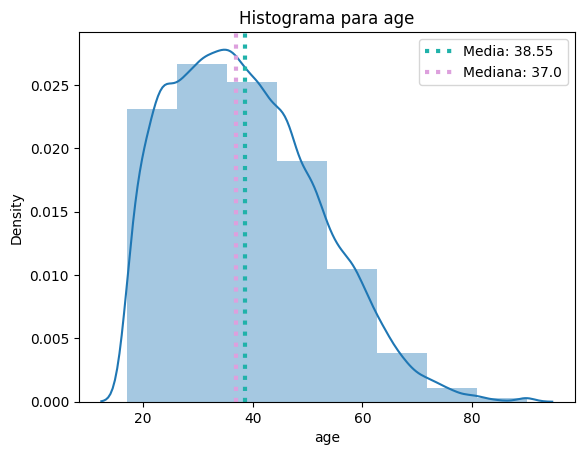

In [45]:
fp.plot_hist(df, "age");

**Comentario:** En la variable age, el minimo es 17 y el maximo 90, existe una concentracion entre los 17 y casi los 55 que corresponde a quizas se concentro la muestra en personas que estaban trabajando. La media y mediana se encuentran relativamente cerca, pero no en el centro de la curva. visualmente no tiende a una curva normal.

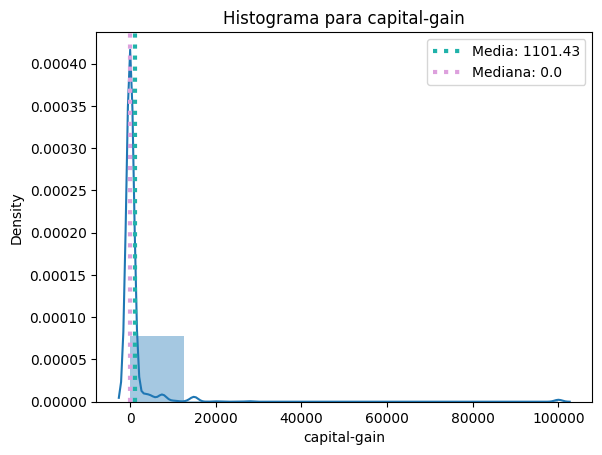

In [46]:
fp.plot_hist(df, "capital-gain");

In [47]:
df["capital-gain"] = np.where(df["capital-gain"] > 0, 1, 0)

**Comentario**: En la variable capital-gain, el minimo es 0 y el maximo 99999, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

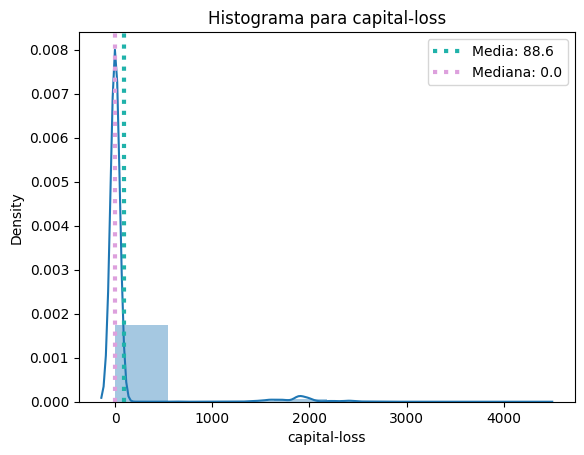

In [48]:
fp.plot_hist(df, "capital-loss");

In [49]:
df["capital-loss"] = np.where(df["capital-loss"] > 0, 1, 0)

**Comentario:** En la variable capital-loss, el minimo es 0 y el maximo 4356, existe una concentracion o acumulacion de 0 (hasta el 75% de los datos segun el describe existen 0). Recodifique la variable como los valores 0 igual a 0, y mayor a 0 como 1

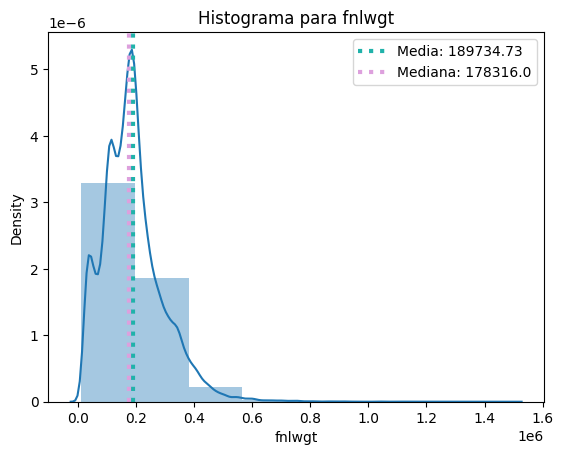

In [50]:
fp.plot_hist(df, "fnlwgt");

**Comentario:** Es un ponderador no sabria interpretar

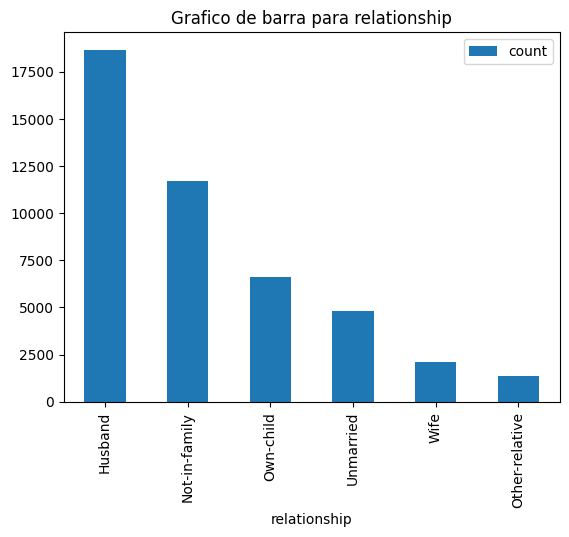

In [51]:
fp.plot_freq(df, "relationship")

**Comentario:** La variable Husband es la de mayor frecuencia, al recodificar esta se dejara fuera. Son pocas las personas other-relative, la mayoria son husband, lo que tambien corresponde que la mayoria de encuestados eran hombres. Hay pocas wife en la muestra.

In [52]:
df["Not-in-family"] = np.where(df["relationship"] == "Not-in-family", 1, 0)
df["Own-child"] = np.where(df["relationship"] == "Own-child", 1, 0)
df["Unmarried"] = np.where(df["relationship"] == "Unmarried", 1, 0)
df["Wife"] = np.where(df["relationship"] == "Wife", 1, 0)
df["Other-relative"] = np.where(df["relationship"] == "Other-relative", 1, 0)

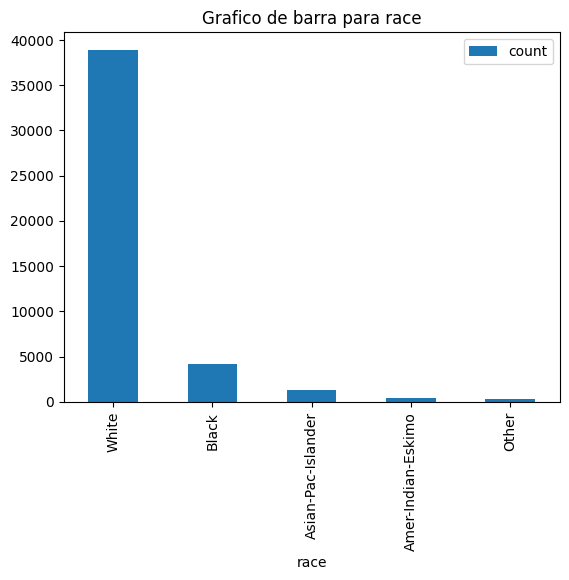

In [53]:
fp.plot_freq(df, "race")

**Comentario:** La variable White es la de mayor frecuencia, al recodificar esta se dejara fuera. Son muy pocas observaciones de las otras variables.

In [54]:
df["Black"] = np.where(df["race"] == "Black", 1, 0)
df["Asian-Pac-Islander"] = np.where(df["race"] == "Asian-Pac-Islander", 1, 0)
df["Amer-Indian-Eskimo"] = np.where(df["race"] == "Amer-Indian-Eskimo", 1, 0)
df["r_Other"] = np.where(df["race"] == "Other", 1, 0)

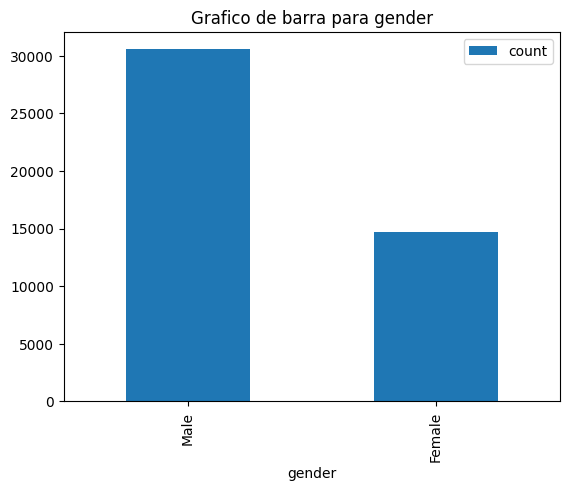

In [55]:
fp.plot_freq(df, "gender")

**Comentario:** La variable Male es la de mayor frecuencia, al recodificar esta se dejara como valor 0. Tiene relacion con el grafico de relationship, se puede que la mayoria de male, aunque aca se puede ver que casi la mitad de female, lo que no se apreciaba en el otro grafico

In [56]:
df["gender"] = np.where(df["gender"] == "Female", 1, 0)


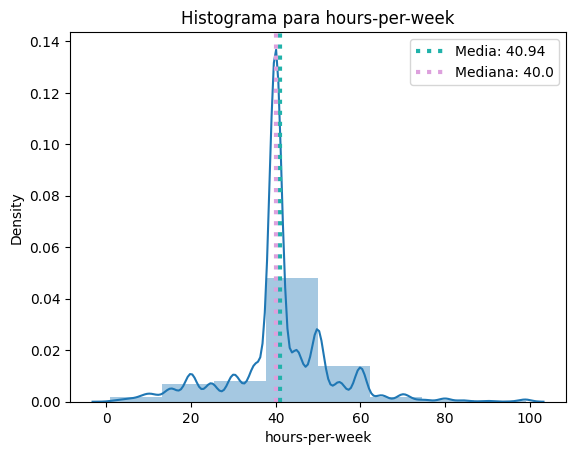

In [57]:
fp.plot_hist(df, "hours-per-week");

En la variable hours-per-week, el minimo es 1 y el maximo 99, existe una concentracion entre los 38 y casi los 50 aprox. que corresponde a quizas a la jornada normal de trabajo. La media y mediana se encuentran relativamente cerca, tambien cerca en el centro de la curva. visualmente no tiende a una curva normal, quizas si hubieran mas datos tendrian mas forma de normal, ya que tiene una curtosis muy grande

## Hito 3

In [58]:
df.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region', 'income',
       'blue-collar', 'c_others', 'self-employed', 'state-level-gov',
       'federal-gov', 'unemployed', 'college', 'university',
       'elementary-school', 'preschool', 'Never-married', 'divorced',
       'separated', 'widowed', 'Asia', 'Africa', 'Europa', 'Not-in-family',
       'Own-child', 'Unmarried', 'Wife', 'Other-relative', 'Black',
       'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'r_Other'],
      dtype='object')

**Comentario:** tuve que realizar un cambio de nombre a las columnas, ya que el al correr el modelo no permitia las variables que tuviera "-"

In [59]:
cambio_nombre_col(df,'educational-num','educational_num')
cambio_nombre_col(df,'Never-married','Never_married')
cambio_nombre_col(df,'blue-collar', "blue_collar")
cambio_nombre_col(df,'hours-per-week', "hours_per_week")
cambio_nombre_col(df,'self-employed', "self_employed")
cambio_nombre_col(df,'state-level-gov', "state_level_gov")
cambio_nombre_col(df,'federal-gov', "federal_gov")
cambio_nombre_col(df,'elementary-school', "elementary_school")
cambio_nombre_col(df,'Not-in-family', "Not_in_family")
cambio_nombre_col(df,'Own-child', "Own_child")
cambio_nombre_col(df,'Other-relative', "Other_relative")
cambio_nombre_col(df,'Asian-Pac-Islander', "Asian_Pac_Islander")
cambio_nombre_col(df,'Amer-Indian-Eskimo', "Amer_Indian_Eskimo")
cambio_nombre_col(df,'capital-gain', "capital_gain")
cambio_nombre_col(df,'capital-loss', "capital_loss")


In [60]:
modelo = smf.logit("income ~ age + educational_num + gender + capital_gain + capital_loss + hours_per_week + blue_collar + c_others + self_employed + state_level_gov + federal_gov + unemployed + college + university + elementary_school + preschool + Never_married + divorced + separated + widowed + Asia + Africa + Europa + Not_in_family + Own_child + Unmarried + Wife + Other_relative + Black + Asian_Pac_Islander + Amer_Indian_Eskimo + r_Other ", df).fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.346677
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.381     
Dependent Variable:   income           AIC:              31420.8878
Date:                 2023-04-22 17:30 BIC:              31708.6260
No. Observations:     45222            Log-Likelihood:   -15677.   
Df Model:             32               LL-Null:          -25322.   
Df Residuals:         45189            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       9.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.5595   0.1681 -33.0700 0.0000 -5.8890 -5.2300
age                 0.0258   0.0013  19.4640 0.0000  0.0232  0.0283
educational_num     0.2873   0.0158  18.2416 0.0000  0.2565  0.3182
gender             -0.7861   0.0603 -13.0431 0.0000 -0.9042 -0.6679
capital_gain        1.6724   0.0460  36.3580 0.0000  1.5822  1.7625
capital_loss        1.1140   0.0581  19.1722 0.0000  1.0001  1.2278
hours_per_week      0.0301   0.0013  23.3520 0.0000  0.0276  0.0327
blue_collar        -0.6127   0.0347 -17.6527 0.0000 -0.6808 -0.5447
c_others           -1.3498   0.0839 -16.0961 0.0000 -1.5141 -1.1854
self_employed      -0.3045   0.0410  -7.4190 0.0000 -0.3850 -0.2241
state_level_gov    -0.1036   0.0450  -2.3015 0.0214 -0.1919 -0.0154
federal_gov         0.4158   0.0733   5.6710 0.0000  0.2721  0.5595
unemployed         -1.2299   0.8032  -1.5312 0.1257 -2.8041  0.3444
college             0.0467   0.0458   1.0180 0.3087 -0.0432  0.1365
university          0.1359   0.0844   1.6115 0.1071 -0.0294  0.3013
elementary_school   0.2863   0.2196   1.3036 0.1924 -0.1442  0.7167
preschool           0.1139   1.0301   0.1105 0.9120 -1.9052  2.1329
Never_married      -1.2105   0.1323  -9.1472 0.0000 -1.4699 -0.9512
divorced           -0.7444   0.1339  -5.5582 0.0000 -1.0069 -0.4819
separated          -0.7846   0.1712  -4.5837 0.0000 -1.1202 -0.4491
widowed            -0.6603   0.1679  -3.9319 0.0001 -0.9895 -0.3312
Asia               -0.4062   0.1467  -2.7699 0.0056 -0.6937 -0.1188
Africa             -1.3620   0.3617  -3.7651 0.0002 -2.0709 -0.6530
Europa              0.1768   0.1039   1.7014 0.0889 -0.0269  0.3804
Not_in_family      -0.9310   0.1301  -7.1584 0.0000 -1.1859 -0.6761
Own_child          -1.8953   0.1597 -11.8680 0.0000 -2.2083 -1.5823
Unmarried          -1.2085   0.1454  -8.3091 0.0000 -1.4935 -0.9234
Wife                1.0684   0.0807  13.2361 0.0000  0.9102  1.2266
Other_relative     -1.3998   0.1802  -7.7692 0.0000 -1.7530 -1.0467
Black              -0.1761   0.0605  -2.9117 0.0036 -0.2947 -0.0576
Asian_Pac_Islander  0.2433   0.1309   1.8591 0.0630 -0.0132  0.4998
Amer_Indian_Eskimo -0.4479   0.1717  -2.6091 0.0091 -0.7844 -0.1114
r_Other            -0.2386   0.2006  -1.1894 0.2343 -0.6318  0.1546
===================================================================

"""

In [61]:
coefs1 = modelo.summary2().tables[1]

dep = coefs1[coefs1["P>|z|"] < 0.05]

In [62]:
dep.index

Index(['Intercept', 'age', 'educational_num', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'blue_collar', 'c_others',
       'self_employed', 'state_level_gov', 'federal_gov', 'Never_married',
       'divorced', 'separated', 'widowed', 'Asia', 'Africa', 'Not_in_family',
       'Own_child', 'Unmarried', 'Wife', 'Other_relative', 'Black',
       'Amer_Indian_Eskimo'],
      dtype='object')

In [63]:
model_dep = smf.logit("income ~ age + educational_num + gender + capital_gain + capital_loss + hours_per_week + blue_collar + c_others + self_employed + state_level_gov +  federal_gov + Never_married + divorced  + separated + widowed + Asia + Africa + Not_in_family + Own_child +  Unmarried + Wife + Other_relative + Black + Asian_Pac_Islander +  Amer_Indian_Eskimo", df).fit()


Optimization terminated successfully.
         Current function value: 0.346829
         Iterations 8


In [64]:
model_dep.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.381     
Dependent Variable:   income           AIC:              31420.6403
Date:                 2023-04-22 17:30 BIC:              31647.3431
No. Observations:     45222            Log-Likelihood:   -15684.   
Df Model:             25               LL-Null:          -25322.   
Df Residuals:         45196            LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -5.7111   0.1232 -46.3661 0.0000 -5.9525 -5.4696
age                 0.0259   0.0013  19.6127 0.0000  0.0233  0.0284
educational_num     0.3070   0.0071  43.1482 0.0000  0.2931  0.3210
gender             -0.7879   0.0602 -13.0811 0.0000 -0.9060 -0.6699
capital_gain        1.6742   0.0460  36.3808 0.0000  1.5840  1.7644
capital_loss        1.1140   0.0581  19.1767 0.0000  1.0001  1.2278
hours_per_week      0.0302   0.0013  23.3574 0.0000  0.0276  0.0327
blue_collar        -0.6223   0.0344 -18.0854 0.0000 -0.6897 -0.5549
c_others           -1.3543   0.0838 -16.1609 0.0000 -1.5186 -1.1901
self_employed      -0.3034   0.0410  -7.3957 0.0000 -0.3838 -0.2230
state_level_gov    -0.1010   0.0450  -2.2465 0.0247 -0.1892 -0.0129
federal_gov         0.4118   0.0732   5.6257 0.0000  0.2683  0.5553
Never_married      -1.2104   0.1321  -9.1607 0.0000 -1.4694 -0.9514
divorced           -0.7511   0.1337  -5.6180 0.0000 -1.0131 -0.4891
separated          -0.7913   0.1709  -4.6291 0.0000 -1.1264 -0.4563
widowed            -0.6684   0.1677  -3.9851 0.0001 -0.9972 -0.3397
Asia               -0.4156   0.1460  -2.8465 0.0044 -0.7018 -0.1294
Africa             -1.3704   0.3612  -3.7940 0.0001 -2.0783 -0.6624
Not_in_family      -0.9237   0.1298  -7.1143 0.0000 -1.1781 -0.6692
Own_child          -1.8924   0.1594 -11.8740 0.0000 -2.2048 -1.5800
Unmarried          -1.2040   0.1452  -8.2904 0.0000 -1.4886 -0.9193
Wife                1.0650   0.0806  13.2055 0.0000  0.9069  1.2231
Other_relative     -1.3966   0.1802  -7.7488 0.0000 -1.7498 -1.0433
Black              -0.1768   0.0604  -2.9246 0.0034 -0.2952 -0.0583
Asian_Pac_Islander  0.2544   0.1305   1.9503 0.0511 -0.0013  0.5101
Amer_Indian_Eskimo -0.4510   0.1715  -2.6295 0.0086 -0.7872 -0.1148
===================================================================

"""

**Verosimilitud de los modelo**

In [65]:
print(f"La log verosimilitud del modelo saturado es de {modelo.llf}")

La log verosimilitud del modelo saturado es de -15677.443920503127


In [66]:
print(f"La log verosimilitud del modelo depurado es de {model_dep.llf}")

La log verosimilitud del modelo depurado es de -15684.32016251805


**Comentario:** No hubo mucha variacion al reducir la cantidad variables, por lo que combiene usar el modelo depurado

In [67]:
coefs_dep = model_dep.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] > 0] 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
age,0.025850,0.001318,19.612693,1.204815e-85,0.023267,0.028434
educational_num,0.307047,0.007116,43.148222,0.000000e+00,0.293100,0.320995
capital_gain,1.674190,0.046018,36.380797,8.566734e-290,1.583995,1.764384
capital_loss,1.113987,0.058091,19.176672,5.797389e-82,1.000132,1.227843
hours_per_week,0.030158,0.001291,23.357424,1.158407e-120,0.027627,0.032689
federal_gov,0.411800,0.073200,5.625663,1.847969e-08,0.268330,0.555270
Wife,1.065013,0.080649,13.205486,8.157206e-40,0.906943,1.223083
Asian_Pac_Islander,0.254422,0.130455,1.950266,5.114438e-02,-0.001265,0.510110


**Interpretacion principales regresores**

Regresores que aportan de manera positiva
- age = A medida que aumenta la edad, aumenta la probabilidad de >50K
- capital_gain = Si gana dinero extra en inversion, aumenta la probabilidad de >50K
- capital_loss = Si pierde dinero extra en inversion, aumenta la probabilidad de >50K
- hours_per_week = Si trabajas mas horas por semana, aumenta la probabilidad de >50K
- federal_gov = Si pertenece a la categoria federal_gov, aumenta la probabilidad de >50K
- Asian_Pac_Islander = Si pertenece a la categoria Asian_Pac_Islander, aumenta la probabilidad de >50K

In [68]:
coefs_dep = model_dep.summary2().tables[1]

coefs_dep[coefs_dep["Coef."] < 0] 

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Intercept,-5.711058,0.123173,-46.366068,0.000000e+00,-5.952473,-5.469643
gender,-0.787922,0.060234,-13.081075,4.224211e-39,-0.905978,-0.669866
blue_collar,-0.622298,0.034409,-18.085358,4.156563e-73,-0.689739,-0.554858
c_others,-1.354303,0.083801,-16.160946,9.509094e-59,-1.518550,-1.190056
self_employed,-0.303431,0.041028,-7.395706,1.406591e-13,-0.383845,-0.223018
state_level_gov,-0.101018,0.044967,-2.246468,2.467405e-02,-0.189152,-0.012883
Never_married,-1.210419,0.132131,-9.160736,5.154456e-20,-1.469392,-0.951447
divorced,-0.751098,0.133695,-5.617992,1.931896e-08,-1.013136,-0.489060
separated,-0.791337,0.170949,-4.629092,3.672719e-06,-1.126391,-0.456284
widowed,-0.668435,0.167733,-3.985124,6.744485e-05,-0.997185,-0.339685


In [69]:
coefs_dep.index

Index(['Intercept', 'age', 'educational_num', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'blue_collar', 'c_others',
       'self_employed', 'state_level_gov', 'federal_gov', 'Never_married',
       'divorced', 'separated', 'widowed', 'Asia', 'Africa', 'Not_in_family',
       'Own_child', 'Unmarried', 'Wife', 'Other_relative', 'Black',
       'Asian_Pac_Islander', 'Amer_Indian_Eskimo'],
      dtype='object')

Regresores que aportan de manera negativa

- gender = Si es mujer, disminuye la probabilidad de >50K
- blue_collar = Si pertenece a la categoria blue_collar, disminuye la probabilidad >50K
- Asian_Pac_Islander = Si pertenece a la categoria others de trabajo, disminuye la probabilidad de >50K
- self_employed = Si pertenece a la categoria self_employed, disminuye la probabilidad de >50K
- state_level_gov = Si pertenece a la categoria state_level_gov, disminuye la probabilidad de >50K
- Never_married = Si nunca se ha casado, disminuye la probabilidad de >50K
- divorced = Si es divorciado, disminuye la probabilidad de >50K
- separated = Si es separado, disminuye la probabilidad de >50K
- Asia = Si asiatico, disminuye la probabilidad de >50K
- Africa = Si africano, disminuye la probabilidad de >50K
- Not_in_family = Si pertenece a la categoria Not_in_family, disminuye la probabilidad de >50K
- Own_child = Si pertenece a la categoria Own_child, disminuye la probabilidad de >50K
- Unmarried = Si pertenece a la categoria Unmarried, disminuye la probabilidad de >50K
- Other_relative = Si pertenece a la categoria Other_relative, disminuye la probabilidad de >50K
- Black = Si pertenece a la categoria Black, disminuye la probabilidad de >50K
- Amer_Indian_Eskimo = Si pertenece a la categoria Unmarried, disminuye la probabilidad de >50K


**Estrategia para modelacion predictiva**

- Con la variables del modelo sin depurar generare un subconjunto de entrenamiento y prueba, separando el 30% de la muestra en el conjunto de pruebas. Usare LogisticRegression, y luego generare y almacenare predicciones de clase y de probabilidad.

- Aplicare lo anterior al modelo depurado, para ver la diferencia que existe

- Probare modelo con mejor rendimiento con intercepto (explicado anteriormente el proceso) y sin intercepto

- No tengo claro si tengo que estandarizar, por lo cual probare si existe mejora al usarlo

- Otra variante puede ser utilizar k-fold

- Para otro modelo hare lo mismo, pero separando el 40% de la muestra

- Para evaluar los modelos utilizare classification_report para ver las metricas de desempeño(accuracy, f1, precision, recall, y roc auc), y de acuerdo a eso tomar la decision de que modelo tiene un mejor rendimiento

- No entendi bien en la pauta, si cada una de estas variantes se considera un modelo predictivo diferente, por lo cual dejare al menos 3 variantes.

## Hito 4

Los import para este hito se realizaron al comienzo del notebook, cuando se pidio en el hito 1

**Modelo 1 y 2: Modelos con todas las variables, test size del 30%. Ambos con y sin intercepto**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[["age", "educational_num", "gender", "capital_gain", "capital_loss", "hours_per_week", "blue_collar", "c_others", "self_employed", "state_level_gov", "federal_gov", "unemployed", "college", "university", "elementary_school", "preschool", "Never_married", "divorced", "separated", "widowed", "Asia", "Africa", "Europa", "Not_in_family", "Own_child", "Unmarried", "Wife", "Other_relative", "Black", "Asian_Pac_Islander", "Amer_Indian_Eskimo", "r_Other"]], df["income"], test_size = .30, random_state = 17971)


In [71]:
scaler = StandardScaler().fit(X_train)

In [72]:
X_train_scaled = scaler.transform(X_train)

In [73]:
X_test_scaled = scaler.transform(X_test)

In [74]:
modelo1_lg_c_int = LogisticRegression(fit_intercept = True)
modelo2_lg_s_int = LogisticRegression(fit_intercept = False)


In [75]:
modelo1_lg_c_int.fit(X_train, y_train)

LogisticRegression()

In [76]:
modelo2_lg_s_int.fit(X_train, y_train)

LogisticRegression(fit_intercept=False)

In [77]:
y_hat_1 = modelo1_lg_c_int.predict(X_test_scaled)

In [78]:
y_hat_2 = modelo2_lg_s_int.predict(X_test_scaled)

In [79]:
y_hat_1_proba = modelo1_lg_c_int.predict_proba(X_test_scaled)[:,1]

In [80]:
print(classification_report(y_test, y_hat_1))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     10224
           1       0.61      0.71      0.66      3343

    accuracy                           0.82     13567
   macro avg       0.75      0.78      0.77     13567
weighted avg       0.83      0.82      0.82     13567



In [81]:
false_positive1, true_positive1, threshold1 = roc_curve(y_test, y_hat_1_proba)

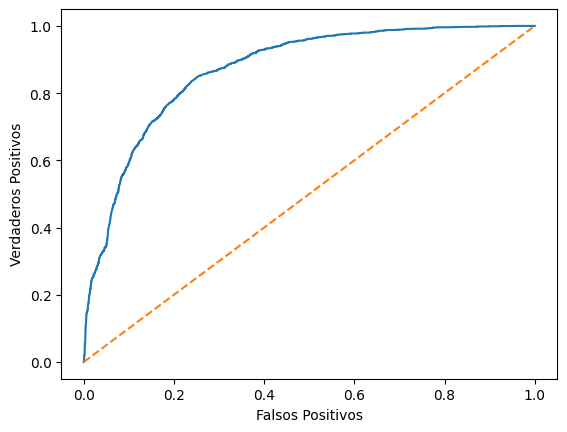

In [82]:
plt.plot(false_positive1, true_positive1)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.plot([0,1], linestyle = "--")

In [83]:
roc_auc_score(y_test, y_hat_1_proba)

0.8703883737162229

In [84]:
y_hat_2_proba = modelo2_lg_s_int.predict_proba(X_test_scaled)[:,1]

In [85]:
print(classification_report(y_test, y_hat_2))

              precision    recall  f1-score   support

           0       0.96      0.60      0.74     10224
           1       0.43      0.93      0.59      3343

    accuracy                           0.68     13567
   macro avg       0.70      0.76      0.66     13567
weighted avg       0.83      0.68      0.70     13567



In [86]:
false_positive2, true_positive2, threshold2 = roc_curve(y_test, y_hat_2_proba)

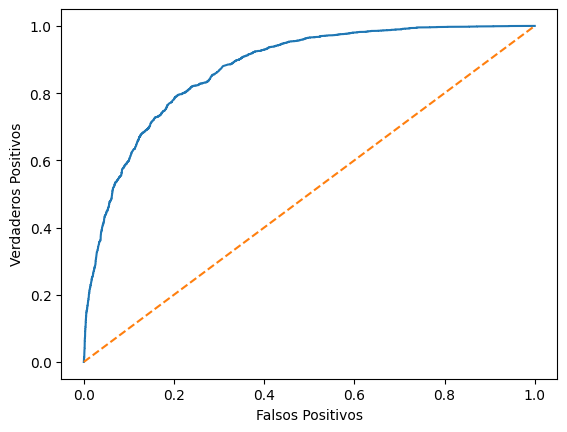

In [87]:
plt.plot(false_positive2, true_positive2)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.plot([0,1], linestyle = "--")

In [88]:
roc_auc_score(y_test, y_hat_2_proba)

0.8739855709522197

**Modelo 3: Modelo con todas las variables, test size del 40%,con intercepto**

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[["age", "educational_num", "gender", "capital_gain", "capital_loss", "hours_per_week", "blue_collar", "c_others", "self_employed", "state_level_gov", "federal_gov", "unemployed", "college", "university", "elementary_school", "preschool", "Never_married", "divorced", "separated", "widowed", "Asia", "Africa", "Europa", "Not_in_family", "Own_child", "Unmarried", "Wife", "Other_relative", "Black", "Asian_Pac_Islander", "Amer_Indian_Eskimo", "r_Other"]], df["income"], test_size = .4, random_state = 17971)


In [90]:
scaler2 = StandardScaler().fit(X_train2)

In [91]:
X_train_scaled2 = scaler2.transform(X_train2)

In [92]:
X_test_scaled2 = scaler2.transform(X_test2)

In [93]:
modelo3_dep_lg_c_int = LogisticRegression(fit_intercept = True)

In [94]:
modelo3_dep_lg_c_int.fit(X_train2, y_train2)

LogisticRegression()

In [95]:
y_hat_3 = modelo3_dep_lg_c_int.predict(X_test_scaled2)

In [96]:
y_hat_3_proba = modelo3_dep_lg_c_int.predict_proba(X_test_scaled2)[:,1]

In [97]:
print(classification_report(y_test2, y_hat_3))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     13606
           1       0.61      0.72      0.66      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.78      0.77     18089
weighted avg       0.83      0.82      0.82     18089



In [98]:
false_positive3, true_positive3, threshold3 = roc_curve(y_test2, y_hat_3_proba)

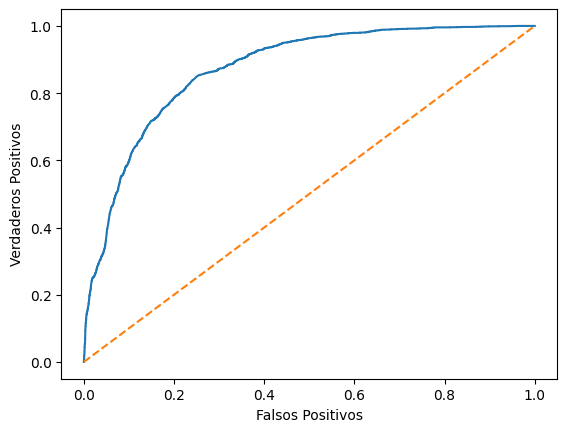

In [99]:
plt.plot(false_positive3, true_positive3)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.plot([0,1], linestyle = "--")

In [100]:
roc_auc_score(y_test2, y_hat_3_proba)

0.872016703538666

**Modelo 4 y 5: Modelos con las variables depuradas, test size del 30%. Ambos con y sin intercepto**

In [101]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df[['age', 'educational_num', 'gender', 'capital_gain',
                                                        'capital_loss', 'hours_per_week', 'blue_collar', 'c_others',
                                                         'self_employed', 'state_level_gov', 'federal_gov', 'Never_married',
                                                         'divorced', 'separated', 'widowed', 'Asia', 'Africa', 'Not_in_family',
                                                         'Own_child', 'Unmarried', 'Wife', 'Other_relative', 'Black',
                                                         'Asian_Pac_Islander', 'Amer_Indian_Eskimo']], df["income"], test_size = .30, random_state = 17971)


In [102]:
scaler3 = StandardScaler().fit(X_train3)

In [103]:
X_train_scaled3 = scaler3.transform(X_train3)

In [104]:
X_test_scaled3 = scaler3.transform(X_test3)

In [105]:
modelo4_lg_c_int = LogisticRegression(fit_intercept = True)
modelo5_lg_s_int = LogisticRegression(fit_intercept = False)


In [106]:
modelo4_lg_c_int.fit(X_train3, y_train3)

LogisticRegression()

In [107]:
modelo5_lg_s_int.fit(X_train3, y_train3)

LogisticRegression(fit_intercept=False)

In [108]:
y_hat_4 = modelo4_lg_c_int.predict(X_test_scaled3)

In [109]:
y_hat_5 = modelo5_lg_s_int.predict(X_test_scaled3)

In [110]:
y_hat_4_proba = modelo4_lg_c_int.predict_proba(X_test_scaled3)[:,1]

In [111]:
print(classification_report(y_test3, y_hat_4))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     10224
           1       0.66      0.36      0.47      3343

    accuracy                           0.80     13567
   macro avg       0.74      0.65      0.67     13567
weighted avg       0.78      0.80      0.77     13567



In [112]:
false_positive4, true_positive4, threshold4 = roc_curve(y_test, y_hat_4_proba)

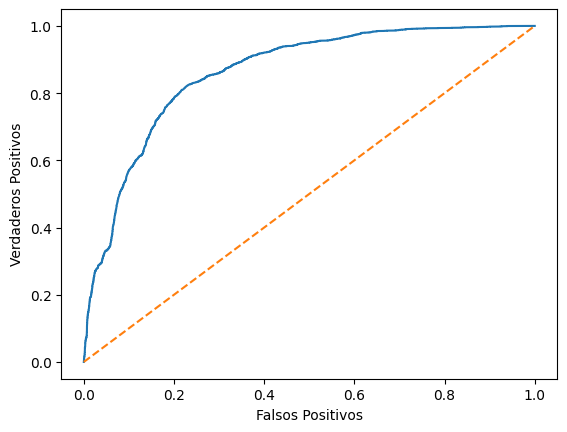

In [113]:
plt.plot(false_positive4, true_positive4)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.plot([0,1], linestyle = "--")

In [114]:
roc_auc_score(y_test3, y_hat_4_proba)

0.8616976291056407

In [115]:
y_hat_5_proba = modelo5_lg_s_int.predict_proba(X_test_scaled3)[:,1]

In [116]:
print(classification_report(y_test3, y_hat_5))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76     10224
           1       0.45      0.91      0.60      3343

    accuracy                           0.70     13567
   macro avg       0.70      0.77      0.68     13567
weighted avg       0.83      0.70      0.72     13567



In [117]:
false_positive5, true_positive5, threshold5 = roc_curve(y_test3, y_hat_5_proba)

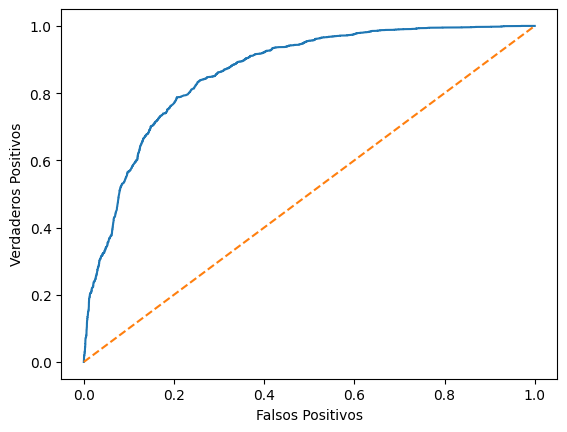

In [118]:
plt.plot(false_positive5, true_positive5)
plt.ylabel("Verdaderos Positivos")
plt.xlabel("Falsos Positivos")
plt.plot([0,1], linestyle = "--")

In [119]:
roc_auc_score(y_test3, y_hat_5_proba)

0.8628488679777003

**Conclusion**

El modelo que encontre que tenia mejor desempeño era el **modelo 3** (se dejan las metricas de este modelo un poco mas abajo), el que tenia todas las variables pero que entreno con un de test size 40%, es el que tiene mas equilibrada las metricas y un buen valor roc_auc. Hubo una mejora al usar el 40% con respecto al de 30$ que quizas se debio al desbalance que habia que las opciones de clasificacion de la variable vector. tiene mejor desempeño para clasificar los 0, porque habian mas de estos datos.
De lo modelos depurado que el presenta mejor desempeño es el modelo con intercepto, no tiene tan buen desempeño como el que tiene todas las variables, pero tiene la ventaja de que menos variables

In [120]:
print(classification_report(y_test2, y_hat_3))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     13606
           1       0.61      0.72      0.66      4483

    accuracy                           0.82     18089
   macro avg       0.76      0.78      0.77     18089
weighted avg       0.83      0.82      0.82     18089



In [121]:
roc_auc_score(y_test2, y_hat_3_proba)

0.872016703538666

**Adicional**

Corregi las sugerencias de que tenia variablas renombradas como others y Others, las cambie por c_others y r_Others

Aparte probe con modelos depurado con test size de 40% con y sin intercepto, y tambien un modelo depurado con significancia de 99% de las variables, pero no hubo alguna mejora notoria. No los coloque para que no quedara tan desordenado y con tantas cosas

Tuve que haber creado funciones mejor para entrenar los modelos, con eso pudo haber quedado mas ordenado y disminuido errores de tipeo, y tambien para futuras ocasiones cuando tenga que probar mas modelos lo tendre en cuenta

Compare y conversamos algunos puntos con mi compañero Joaquin Alfaro